# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.random.seed(500)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv('data/human_body_temperature.csv')

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1. Normality Test of Temperature Data

After reading the data into a DataFrame, we'll first have a look at the temperature distribution to see if it looks normally distributed. For this purpose we'll plot out the PDF and ECDF and compare it with a normal distribution (i.e. [Kolmogorov-Smirnov Test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test))

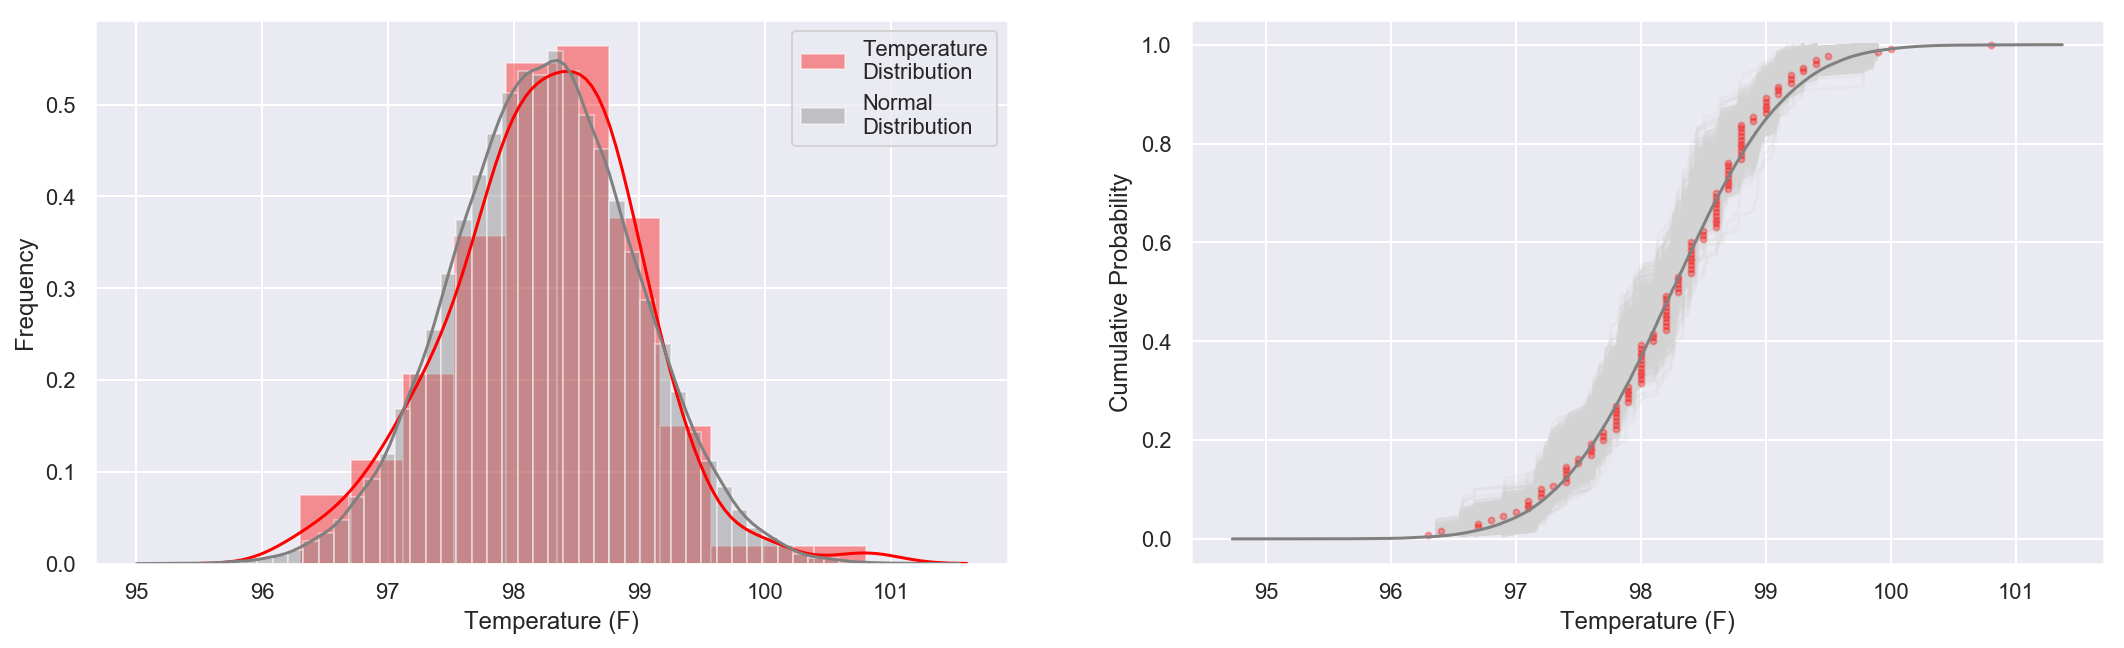

In [51]:
def bins_rule_of_thumb(data):
    return int(np.sqrt(len(data)))

bins = bins_rule_of_thumb(df['temperature'])
temp_mu = df['temperature'].mean()
temp_sigma = df['temperature'].std()
s_size = 100000

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18, 5))

# Plot a PDF Normality Plot
_ = plt.subplot(1,2,1)

_ = sns.distplot(df['temperature'],bins=bins,color='red')
_ = sns.distplot(np.random.normal(temp_mu,temp_sigma,size=s_size),color='gray')

_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Frequency')
_ = plt.legend(['Temperature\nDistribution','Normal\nDistribution'],loc='upper right')

# Plot an ECDF Normality Plot
_ = plt.subplot(1,2,2)

def ecdf(data):
    """
    Returns the x,y values for data for plotting as an ecdf.
    """
    
    # Sort the data along the x-axis
    x = np.sort(data)
    
    # Index the data at equidistant intervals
    y = np.arange(1, len(x) + 1) / len(x)
    
    return x,y

def draw_conf_int(data,func,size=1):
    for i in range(size):
        bs_samples = np.random.choice(data,size=len(data))
        x_theor,y_theor = ecdf(bs_samples)
        _ = plt.plot(x_theor,y_theor,color='lightgray',alpha=0.2)
    
    return

def ecdf_normality(test_data):
    """
    Returns the x,y values for an ecdf function of the test data as well as for a normal distribution 
    set with mu and sigma equal to the mean and std of the test_data. This function requires the ecdf()
    function to be available.
    """
    
    # determine mu and sigma from test_data and generate samples
    mean = test_data.mean()
    std = test_data.std()
    samples = np.random.normal(mean,std,size=s_size)
    
    # create x,y values for test_data and generated normal samples
    x,y = ecdf(test_data)
    x_theor,y_theor = ecdf(samples)
    draw_conf_int(np.random.normal(loc=mean,scale=std,size=len(test_data)),ecdf,size=1000)
    
    return (x_theor,y_theor),(x,y)

# get plotting axes for temperature data and normal distribution
(x_theor,y_theor),(x,y) = ecdf_normality(df['temperature'])

_ = plt.plot(x,y,marker='.',linestyle='none',color='red',alpha=0.3)
_ = plt.plot(x_theor,y_theor,color='gray',alpha=1)

_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Cumulative Probability')

plt.show()

Judging visually the Probability Density Functions (PDF) and Cumulative Distribution Function (CDF) of Human Body Temperature and Normal Samples could be the same, especially considering the relatively small sample of 130 Temperature measurements. Another common _fitting_ test of normality a Normal Probability Plot, a special case of the Q-Q plot. We'll look at that one next.

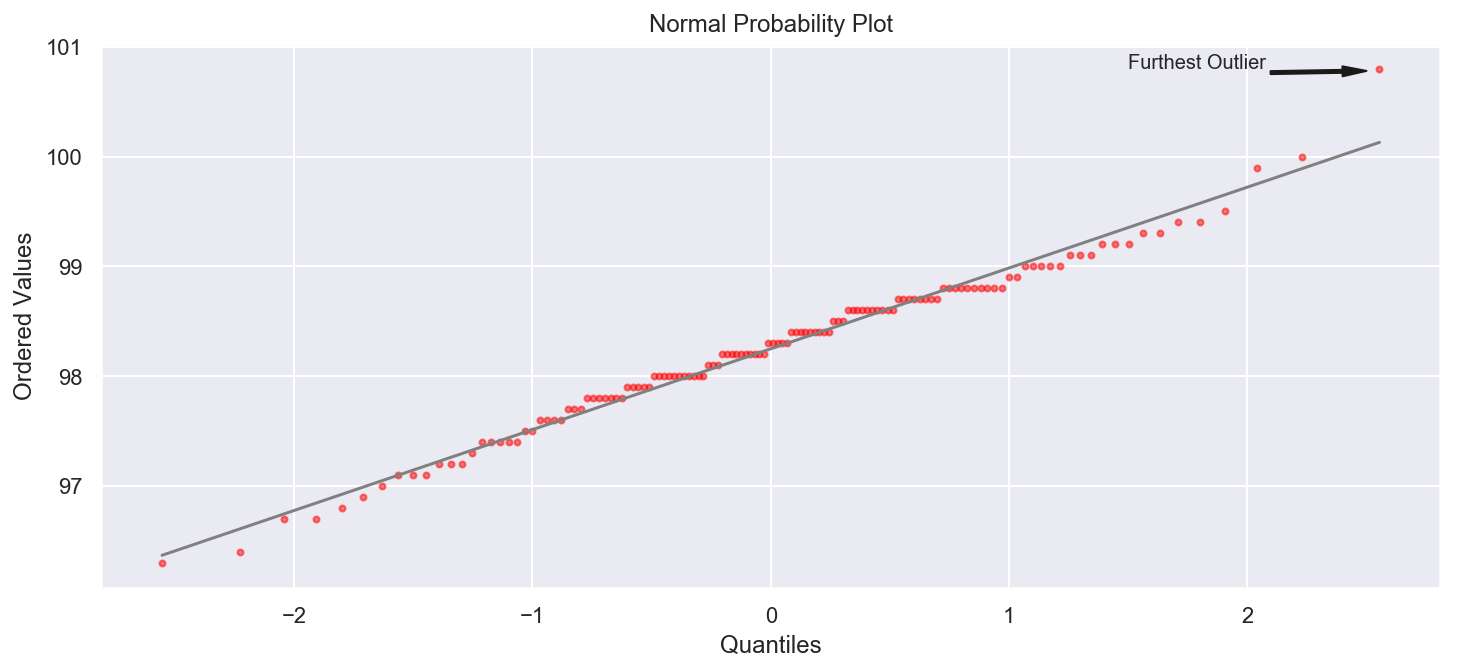

In [54]:
import pylab 
import scipy.stats as stats

def lreg_line(slope,intercept,test_data):
    x_lreg = np.array([min(test_data),max(test_data)])
    y_lreg = slope * x_lreg + intercept
    return x_lreg,y_lreg
        
def qq_plot(data):
    
    fig, ax = plt.subplots(1,1,figsize=(12, 5))
    _ = plt.subplot(1,1,1)
    (x,y), (slope,intercept,r) = stats.probplot(data, dist="norm", plot=None)
    _ = plt.plot(x,y,marker='.',linestyle='none',color='red',alpha=0.5)
    x_lreg,y_lreg = lreg_line(slope,intercept,x)
    _ = plt.plot(x_lreg,y_lreg,color='gray')
    _ = plt.xlabel('Quantiles')
    _ = plt.ylabel('Ordered Values')
    _ = plt.title('Normal Probability Plot')

qq_plot(df['temperature'])

# Furthest Outlier
_ = plt.annotate(s='Furthest Outlier',xy=(2.5,100.78),
                 xytext=(1.5,100.8),arrowprops={'width':1.5,'headwidth':5,'color': 'k'})

plt.show()

In [4]:
# For reference this will create a Q-Q plot without the scipy stats package
sorted_temp = np.sort(df['temperature'])
x = np.random.normal(loc=0,scale=sorted_temp.std(),size=1000)
x = np.percentile(x,np.linspace(0,100,len(sorted_temp)))
slope, intercept = np.polyfit(x,sorted_temp,1)
y = slope * x + intercept

# Uncomment the following three lines to display the graph
# fig, ax = plt.subplots(1,1,figsize=(12, 5))
# _ = plt.plot(x,sorted_temp,marker='.',linestyle='none',color='red',alpha=0.5)
# _ = plt.plot(x,y,color='gray')

Considering the relatively low sample size, the distribution is very closely aligned with a Normal distribution, i.e. the data is largely falling onto the line through the 1st and 3rd quantile). There's a one value at the upper edge that is divergent from the linear function but not something we should worry about. 

Since we visually were able to show that a Normal Distribution is reasonable to assume, we can go on to use the Shapiro-Wilk test to ensure our visual assessment is accurate.

The Shapiro-Wilk test is a one-sided test (right tail) and can only be used on continuous, univariate data ([source](https://www.youtube.com/embed/dRAqSsgkCUc)).

H0: The Temperature data is normally distributed.

In [5]:
W, p = stats.shapiro(df['temperature'])
print("W = {} and p = {}".format(W,p))

W = 0.9865770936012268 and p = 0.233174666762352


We're unable to reject the Null Hypothesis for p <= 0.05 as the W statistic is close to 1 and p = 0.23. In conclusion, our tests and analysis was unable to reject H0 and we'll therefore assume we're working with a Normal distribution for the rest of this analysis.

# 2. Sample Size and Observation

For the Central Limit Theorem to apply two additional requirements need to be fulfilled:

1. The samples need to be "independent observations". 
    _"Two observations are independent if the occurrence of one observation provides no information about the occurrence of the other observation."_ ([source](http://www.nedarc.org/statisticalHelp/statisticalTermsDictionary.html))
    - Since we haven't acquired the data ourselves, we have to make an assumption. The observations are independent, if the data was measured in different people at one point in time (not multiple times across time).
    
    
2. The samples need to be "sufficiently large". A rule of thumb is that a sample size should be >=30 ([source](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html))
    - We can see that there is a total of 130 measurements in the data set, putting the size of this sample well above the necessary minimum.

In [6]:
print("There are {} measurements in the data set.".format(len(df['temperature'])))

There are 130 measurements in the data set.


# 3a. Investigating the True Population Mean using Bootstrapping

To get an idea whether the true population mean of the Human Body Temperature is at 98.6F. Let's first conduct a bootstrap test. 

    H0: The true population mean of the Human Body Temperature is 98.6F.

The mean of the data set is 98.24923076923075.


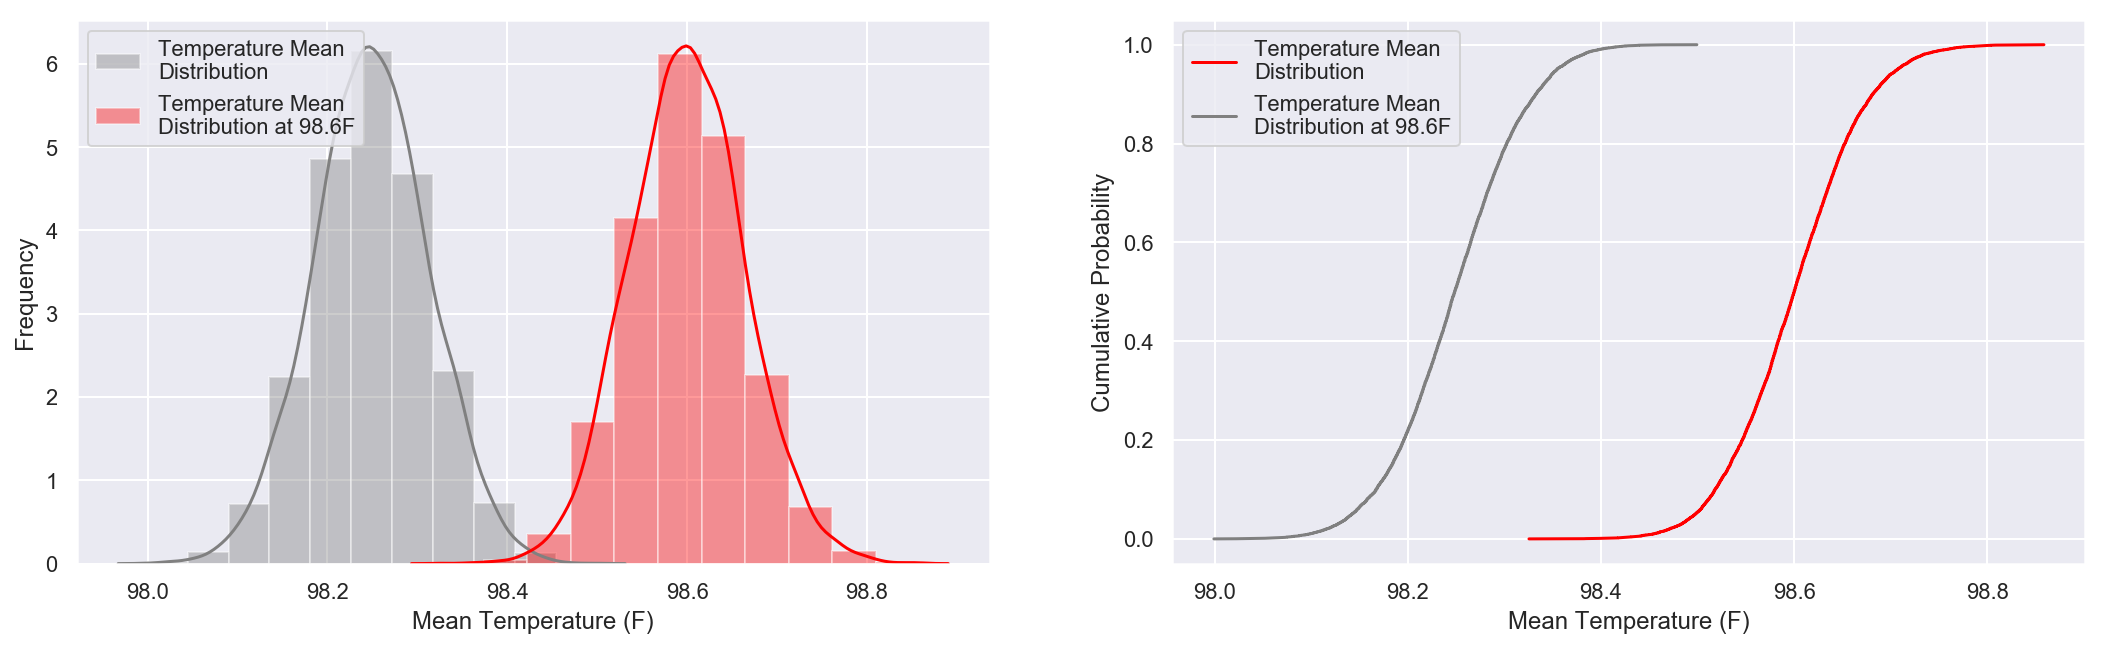

p: 0.0
CI (p<0.05): [98.47769231 98.72769231]
Cohen's d is 5.476148611235384.


In [42]:
data = df['temperature']
data_mean = np.mean(data)
h0_mean = 98.6
h0_data = data - np.mean(data) + h0_mean
sample_size = 10000

print("The mean of the data set is {}.".format(data_mean))

def draw_bs_sample(data,size=len(data)):
    return np.random.choice(data,size=size)

def bootstrap_replicate_1d(data,func):
    bs_sample = draw_bs_sample(data) # Draws full length sample of data set
    return func(bs_sample)

def draw_bs_replicates(data,func,size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    
    return bs_replicates

data_bs_replicates = draw_bs_replicates(data,np.mean,size=sample_size)
# For these replicates we'll assume the same standard deviation / variance for our h0 data
h0_bs_replicates = draw_bs_replicates(h0_data,np.mean,size=sample_size)

x_data,y_data = ecdf(data_bs_replicates)
x_h0,y_h0 = ecdf(h0_bs_replicates)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18, 5))
_ = plt.subplot(1,2,1)

_ = sns.distplot(data_bs_replicates,bins=bins,color='gray')
_ = sns.distplot(h0_bs_replicates,bins=bins,color='red')

_ = plt.xlabel('Mean Temperature (F)')
_ = plt.ylabel('Frequency')
_ = plt.legend(['Temperature Mean\nDistribution','Temperature Mean \nDistribution at 98.6F'],loc='upper left')

_ = plt.subplot(1,2,2)

_ = plt.plot(x_h0,y_h0,color='red',alpha=1)
_ = plt.plot(x_data,y_data,color='gray',alpha=1)

_ = plt.xlabel('Mean Temperature (F)')
_ = plt.ylabel('Cumulative Probability')
_ = plt.legend(['Temperature Mean\nDistribution','Temperature Mean \nDistribution at 98.6F'],loc='upper left')


plt.show()

# Calculate the p-value
p = np.sum(h0_bs_replicates <= data_mean) / len(h0_bs_replicates)
print("p: {}".format(p))

# Calculate the Confidence Interval
conf_int = np.percentile(h0_bs_replicates,[2.5,97.5])
print("CI (p<0.05): {}".format(conf_int))

# Calculate the Pooled Standard Error assuming that both graphs (as above) have the same variance ([source](https://www.youtube.com/watch?v=kkEszcVaWhA))
pooled_deg_f = len(data_bs_replicates) + len(h0_bs_replicates) - 2 
pooled_std = (np.std(data_bs_replicates) * (len(data_bs_replicates) - 1) + \
                np.std(h0_bs_replicates) * (len(h0_bs_replicates) - 1)) / pooled_deg_f

# Calculate Cohen's D to quantify the Effect Size (https://en.wikiversity.org/wiki/Cohen%27s_d)
d = (np.mean(h0_bs_replicates) - np.mean(data_bs_replicates)) / pooled_std
print("Cohen's d is {}.".format(d))

_Interpretation:_ The data's mean 98.25F has a p-value of 0.0 (i.e. we were unable to generate this value even once for 10000 tries). The Confidence Interval (CI) for p < 0.05 ranges from 98.47F to 98.72F.

_Conclusion_: We can reject H0 for p < 0.001. A random sample with a point estimate of 98.25F is statistically unlikely (p<0.001) for the true mean of 98.6F in this distribution.

# 3b. Investigating the True Population Mean using the Frequentist Approach

So far we've been using bootstrap statistics, I'll look at this issue from a more traditional frequentist viewpoint.

The one-sample test is appropriate in this situation as we test one set of data to a single statistic (98.6F as the true mean). 

Furthermore, the _z-statistic_ is more appropriate for large sample sizes (>=30 samples). Since we don't know the standard deviation of the population but have a large sample, we can use the sample standard deviation for this test ([source](https://en.wikibooks.org/wiki/Statistics/Testing_Data/z-tests)).

Formulas: 
- z=(x-mu)/std -- Z Value
- SE=std/np.sqrt(len(data)) -- Sample Error
- CI +- Margin of Error (ME) -- Confidence Interval
- ME = z_crit*SE -- Margin of Error
- deg_f = len(data) - 1 -- Degrees of Freedom

Treatment:
- Value adjustments of measurements with the mean of 98.6F.

Define the hypotheses:
- H0: The true mean of the Human Body Temperature is 98.6F.
- H1: The true mean of the Human Body Temperature is not 98.6F (two-sided, one-sample test).

95% Confidence Interval (CI) (alpha=0.05):
- z_crit = -1.96/1.96

In [25]:
def z_test_mean_diff(data,h0_mean,population_std=None):
    """
    Takes in original data, modifies it to simulate h0_mean (target mean) and compares it 
    to a point estimate (mean) using the z-statistic. This approach is used for large samples
    """
    
    # Treatment
    data_mean = np.mean(data)
    data_h0 = data - data_mean + h0_mean
    if population_std:
        h0_std = population_std
    else:
        h0_std = np.std(data_h0) # np.sqrt(np.sum((data_h0-h0_mean)**2)/len(data))
        if len(data) < 30:
            print("WARNING: You didn't provide a population standard deviation and the sample size is too small \
to use the sample standard deviation as an approximation.")
    print("Mean H0: {}F".format(h0_mean))
    print("Mean Point Estimate: {}F".format(data_mean))

    # The length of data is equal (n_h0 == n_data)
    n = len(data_h0)

    # Standard Error Calculation
    SE = h0_std/np.sqrt(n)
    print("Standard Error (SE): {}".format(SE))

    # Z Value
    z = (data_mean - h0_mean)/SE
    print("z: {}".format(z))

    # Confidence Interval Calculation (with p<0.05)
    z_crit = 1.96
    ME = z_crit * SE
    CI = [h0_mean - ME, h0_mean + ME]
    print("CI: {}".format(CI))
    
    return (z,CI)
    
z_test_mean_diff(df['temperature'],h0_mean=98.6)

Mean H0: 98.6F
Mean Point Estimate: 98.24923076923075F
Standard Error (SE): 0.06405661469519337
z: -5.4759252020785585
CI: [98.47444903519741, 98.72555096480258]


(-5.4759252020785585, [98.47444903519741, 98.72555096480258])

_Interpretation:_ The z-value of the point estimate falls within the critical region and is significant for p < 0.001 (z < -3.1).
The boundaries of the CI for p<0.05 are (98.47F, 98.73F)

_Conclusion:_ We reject H0, it is unlikely that the true mean of the population is 98.6F.

### Comparing Bootstrapping and Frequentist Approach

The results are astonishingly similar, despite the bootstrapping approach using a brute force method. There's a minor difference between the Confidence Intervals of ~0.004. The biggest difference between the frequentist approach and the bootstrapping method is that with the former we're using z-values to make our decision and with the latter we're calculating p-values directly.

# 4. Compare Z-Test vs T-Test with Small Sample Size

To better understand the difference between the two tests we'll draw a small sample of 10 from the data set and conduct a T-Test (the appropriate test for a small sample size - i.e. < 30) and for comparison's sake we repeat the Z-Test for this smaller sample as well.

In [29]:
np.random.seed(500)
sm_sample = np.random.choice(df['temperature'],size=10)
print(sm_sample)

[97.8 97.4 98.2 97.6 98.  97.7 98.4 98.2 98.4 99.3]


To understand the difference between the z-test and t-test, we'll perform the above analysis again, this time using the t-test.

Formulas: 
- t=(x-mu)/SEM -- T Value
- S= np.sqrt(np.sum(data-mu)\**2)/deg_f) -- Sample Standard Deviation
- SEM=S/np.sqrt(len(data)) -- Sample Standard Error of the Mean
- CI +- Margin of Error (ME) -- Confidence Interval
- ME = t_crit*SEM
- deg_f = len(data) - 1

Treatment:
- Value adjustments of measurements with the mean of 98.6F.

Define the hypotheses:
- H0: The true mean of the Human Body Temperature is 98.6F.
- H1: The true mean of the Human Body Temperature is not 98.6F (two-sided, one-sample test).

95% Confidence Interval (CI) (alpha=0.05):
- t_crit = -1.984/1.984

In [30]:
def t_test_mean_diff(data,h0_mean):
    """
    Takes in original data, modifies it to simulate h0_mean (target mean) and compares it 
    to a point estimate (mean) using the t-statistic. This approach is used for small samples
    """
    
    # Treatment
    data_mean = np.mean(data)
    data_h0 = data - data_mean + h0_mean
    deg_f = len(data)-1
    h0_s = np.sqrt(np.sum((data_h0-h0_mean)**2)/deg_f)
    print("Mean H0: {}F".format(h0_mean))
    print("Mean Point Estimate: {}F".format(data_mean))

    # The length of data is equal (n_h0 == n_data)
    n = len(data_h0)

    # Standard Error Calculation
    SEM = h0_s/np.sqrt(n)
    print("Sample Standard Error of the Mean (SEM): {}".format(SEM))

    # T Value
    t = (data_mean - h0_mean)/SEM
    print("t: {}".format(t))

    # Confidence Interval Calculation (with p<0.001)
    t_crit = 1.984
    ME = t_crit * SEM
    CI = [h0_mean - ME, h0_mean + ME]
    print("CI: {}".format(CI))
    
    return (t,CI)

t_test_mean_diff(sm_sample,98.6)
print('------------------------')
z_test_mean_diff(sm_sample,98.6)

Mean H0: 98.6F
Mean Point Estimate: 98.1F
Sample Standard Error of the Mean (SEM): 0.17126976771553498
t: -2.9193710406057125
CI: [98.26020078085237, 98.93979921914762]
------------------------
Mean H0: 98.6F
Mean Point Estimate: 98.1F
Standard Error (SE): 0.16248076809271914
z: -3.0772872744833197
CI: [98.28153769453826, 98.91846230546173]


(-3.0772872744833197, [98.28153769453826, 98.91846230546173])

Comparing the Z-Test and T-Test, we can see that the T-Test allows to take the relatively small sample size into consideration (this is largely due to using the Student t distribution). We can see this lower certainty in a higher Stander Error of the Mean (compared to the Standard Error) and a t-value closer to zero (indicating a slightly higher probability than the Z-Test). Lastly, the CI spans a larger set of values leaving more values to acceptable to H0.

In conclusion, we can still reject H0 for p<0.01 but with less certainty (Note that in the previous exercise/test we were able to reject H0 for p<0.001). This is despite the point estimate of the smaller sample (98.1F) being further away than the large sample's point estimate (98.2F). It's clear that the t-test is most valuable for smaller sample sizes and allows for less rigid boundaries. For larger samples the t-test is less precise and we should use the z-test.

# 5. Asses whether someone's temperature is "abnormal"

To make an appropriate assessment we won't be looking at means anymore but as singular measurements, as we want to assess the abnormality of a single person's temperature. The expectation is that we'll work with wider range of possible values over our previous analyses.

To understand whether a temperature is abnormal, we first need to determine the values that would fall into the "normal" category. In this case, we choose a 95% Confidence Interval (p<0.05). Since this is a two-sided test, this means that if a value has a probability of less than 2.5% (or 1.96 Standard Deviations from the mean) we consider it "abnormal".

95% CI (p<0.05) for Bootstrap Samples: [96.8975 99.51  ]
95% CI (p<0.05) for Normal Approximation: [96.87698594 99.6895618 ]


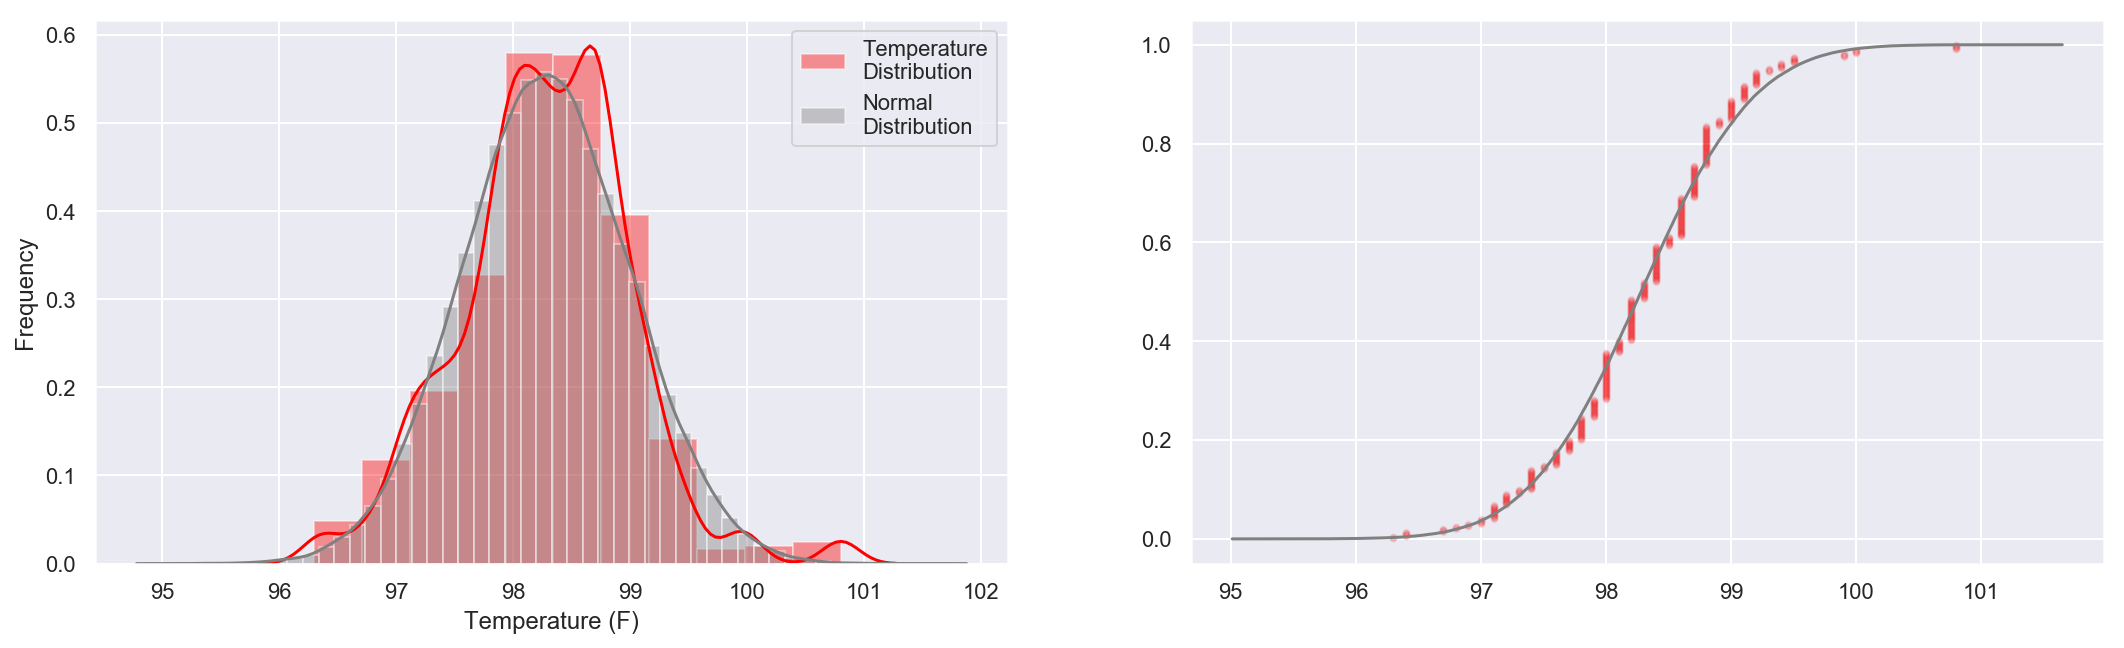

In [107]:
data= df['temperature']
bins = bins_rule_of_thumb(data)
s_size = 1000

bs_samples = np.empty(s_size)

for i in range(s_size):
    bs_samples[i] = draw_bs_sample(data,size=1)

np.random.seed(500)
bs_samples_theor = np.random.normal(np.mean(bs_samples),np.std(bs_samples),size=100000)

x,y = ecdf(bs_samples)  
x_theor,y_theor = ecdf(bs_samples_theor)    

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))

_ = plt.subplot(1,2,1)

_ = sns.distplot(bs_samples,bins=bins,color='red')
_ = sns.distplot(bs_samples_theor,color='gray')

_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Frequency')
_ = plt.legend(['Temperature\nDistribution','Normal\nDistribution'],loc='upper right')

_ = plt.subplot(1,2,2)
_ = plt.plot(x,y,marker='.',linestyle='none',color='red',alpha=0.05)
_ = plt.plot(x_theor,y_theor,color='gray',alpha=1)

conf_int = np.percentile(bs_samples,[2.5,97.5])
print("95% CI (p<0.05) for Bootstrap Samples: {}".format(conf_int))
conf_int = np.percentile(bs_samples_theor,[2.5,97.5])
print("95% CI (p<0.05) for Normal Approximation: {}".format(conf_int))

With a 95% CI for the Bootstrapped Test it is possible to consider temperatures <96.8F and >99.5F "abnormal". Since the sample we used had relatively few distinct values we can assume that certain values got over-/underestimated using the Bootstrap method. For that reason I've used the Normal Distribution model as a comparison (np.random.normal() paired with the same mean and standard deviation as the bootstrapped samples). 

The latter method will yield very similar results to the frequentist approach used in the next part (especially as the 'size' attribute goes toward infinity). In this case, temperatures <96.86F and >99.67F are considered "abnormal".

In the following we'll perform a z-test for the same consideration of what temperature should be considered "abnormal". Same as in the previous test we'll use a 95% CI (p < 0.05).

In [105]:
# Treatment
data_mean = np.mean(data)
data_std = np.std(data) # np.sqrt(np.sum((data_h0-h0_mean)**2)/len(data))
print("Mean: {}F".format(data_mean))

# We're looking for a sample of 1 at a time
n = 1

# Standard Error Calculation
SE = data_std/np.sqrt(1)
print("Standard Error (SE): {}".format(SE))

# Confidence Interval Calculation (with p<0.05)
z_crit = 1.96
ME = z_crit * SE
CI = [data_mean - ME, data_mean + ME]
print("CI: {}".format(CI))

Mean: 98.24923076923075F
Standard Error (SE): 0.730357778905038
CI: [96.81772952257687, 99.68073201588463]


As mentioned above the frequentist approach and the approximation using np.random.normal() mentioned above yield similar results. Using the Z-Test method we can consider temperatures <96.82F and >99.68F as "abnormal" with 95% Confidence (p<0.05).

# 6. Difference in Temperature between Males and Females

Is there a difference between Males and Females in terms of their normal Body Temperature?

    H0: There is no difference in the normal temperature distribution between males and females.

I'll use a bootstrap method and a frequentist approach to solve this question.

In this problem we're comparing the distribution of temperature for males and females (not the mean temperature itself). To solve such a problem we'll need to use permutation and generate a PDF and ECDF of means to create a distribution to asses the difference of means. Once we've created these replicates we can use the difference of means of the original distributions to assess its likelihood.

In [141]:
# Create Permutation Sample Function
def permutation_sample(data1,data2):
    """
    Creates a Permutation Sample from two data sets and returns two permutated samples 
    with the same length as the original sets.
    """
    data_both = np.concatenate((data1,data2))
    data_perm = np.random.permutation(data_both)
    perm_sample_1 = data_perm[:len(data1)]
    perm_sample_2 = data_perm[len(data1):]
    return (perm_sample_1,perm_sample_2)

# Define function to generate Permutation Replicates
def draw_perm_reps(data1,data2,func,size=1):
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1,perm_sample_2 = permutation_sample(data1,data2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
        
    return perm_replicates
        
# Define Comparison Function Difference of Means
def diff_means(data1,data2):
    return np.mean(data1) - np.mean(data2)

In [154]:
f_temp = df.loc[df['gender'] == 'F','temperature']
m_temp = df.loc[df['gender'] == 'M','temperature']

point_estimate_diff = diff_means(f_temp,m_temp)
print("Difference of Means from the Point Estimate: {}".format(point_estimate_diff))

Difference of Means from the Point Estimate: 0.2892307692307696


It looks like the body temperature of females in our point estimate is slightly higher on average. Let's see whether this is a significant difference or not.

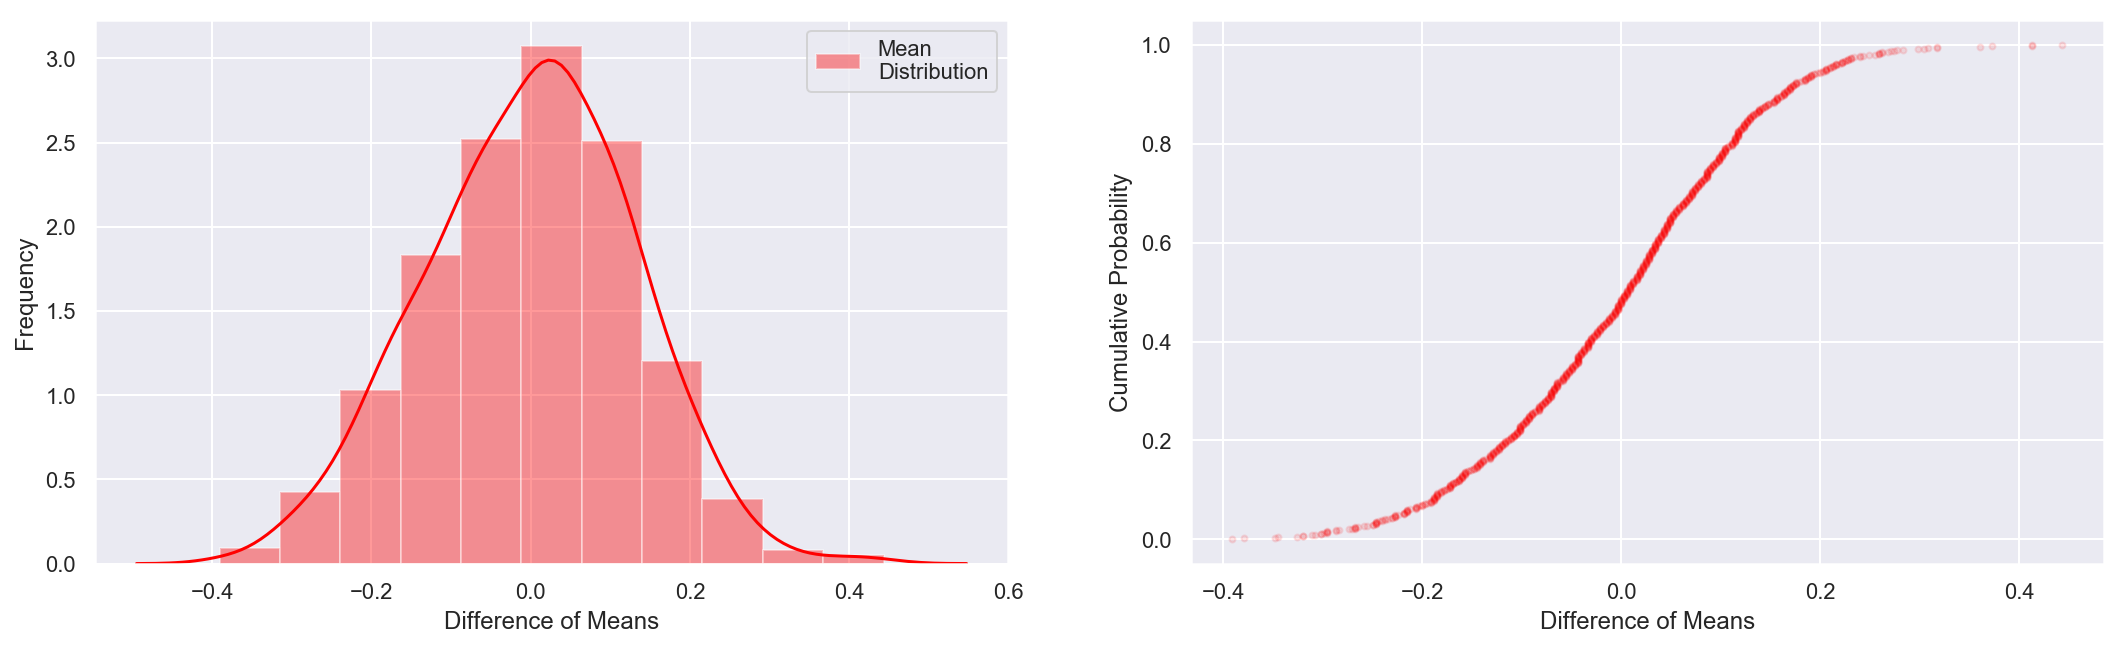

p: 0.01
CI: [-0.26469231  0.234     ]


In [156]:
np.random.seed(500)

perm_reps = draw_perm_reps(f_temp,m_temp,diff_means,size=1000)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18, 5))

# Plot a PDF Normality Plot
_ = plt.subplot(1,2,1)

_ = sns.distplot(perm_reps,bins=bins,color='red')

_ = plt.xlabel('Difference of Means')
_ = plt.ylabel('Frequency')
_ = plt.legend(['Mean\nDistribution'],loc='upper right')

# Plot an ECDF Normality Plot
_ = plt.subplot(1,2,2)


x,y = ecdf(perm_reps)

_ = plt.plot(x,y,marker='.',linestyle='none',color='red',alpha=0.1)

_ = plt.xlabel('Difference of Means')
_ = plt.ylabel('Cumulative Probability')

plt.show()

# Calculate the p-value
p = np.sum(perm_reps >= point_estimate_diff) / len(perm_reps)
print("p: {}".format(p))

# Calculate the 95% CI
CI = np.percentile(perm_reps,[2.5,97.5])
print("CI: {}".format(CI))

_Interpretation:_ The probability of generating a mean difference of 0.29, assuming males and females have the same core temperature, is unlikely (p<0.05). The 95% CI rejects H0 for values <0.26 and >0.234 (p<0.05)

_Conclusion:_ We reject H0, it is unlikely that males and females have equal Body Temperature distributions. This means that the normal Body Temperature does not only vary from individual to individual but also varies significantly (p<0.05) between genders. 

_Further Questions:_ It looks like in this case females run slightly hotter than men on average. Considering the common conception that women run cooler than men, it would be interesting to see how actual body temperature correlates with the feeling of being cold. Is the feeling of being cold related to one's actual body temperature or is that caused by other factors?